Import the necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Generating random numbers

In [2]:
x = np.random.uniform(-10, 10, 100)

Let's do quadratic function for the y values.<br>
The quadratic function formula: $y = 2x^2 + 3x + 5$ + gaussian noise

In [3]:
y = 2 * x**2 + 3 * x + 5 + np.random.normal(0, 20, 100)

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

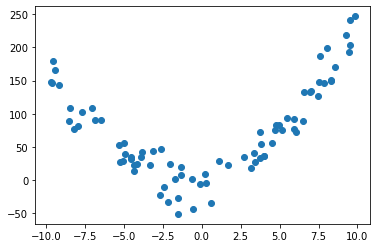

In [5]:
%matplotlib inline
plt.plot(x_train, y_train, 'o')
plt.show()

The data is obviously quadratic. So, to experiment both with bias and variance issues, we will try to fit two models to the data. One will be a linear model and the other will be a 4 dimension polynomail model.

1st - Linear Model

In [6]:
from sklearn.linear_model import LinearRegression

ln_model = LinearRegression()
ln_model.fit(x_train.reshape(-1, 1), y_train)

LinearRegression()

Let's calculate the score for the linear model

In [7]:
ln_model.score(x_train.reshape(-1, 1), y_train)

0.1302794255845121

It is severly underfitting the data. Let's try to get the score on the test set.

In [8]:
ln_model.score(x_test.reshape(-1, 1), y_test)

-0.26007055105238086

Well, this linear model is very bad it performs worsely in both training and test sets. It is underfitting the model and this is the sign of **bias**!<br> Let's try to fit a 8th degree polynomial model.

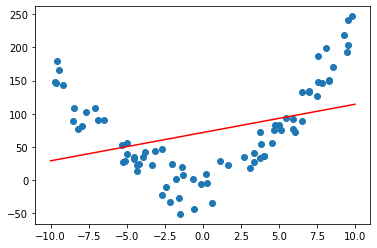

In [15]:
x_line = np.linspace(-10, 10, 100)
y_line = ln_model.predict(x_line.reshape(-1, 1))

plt.plot(x_train, y_train, 'o')
plt.plot(x_line, y_line, 'r')
plt.show()

2nd - Polynomial Model

In [9]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=8)
x_train_poly = poly.fit_transform(x_train.reshape(-1, 1))
poly_model = LinearRegression()
poly_model.fit(x_train_poly, y_train)

LinearRegression()

In [10]:
poly_model.score(x_train_poly, y_train)

0.9245400673249129

Well, the score doesn't look bad on the training set. 92% score is good enough... this is the sign of **Variance**! It is overfitting the model!<br>
Let's checkout the result on the test set

In [11]:
x_test_poly = poly.fit_transform(x_test.reshape(-1, 1))
poly_model.score(x_test_poly, y_test)

0.803425573356244

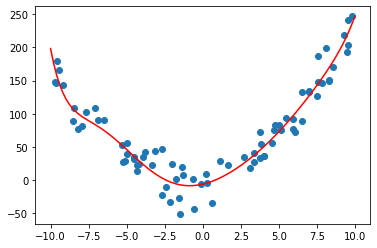

In [17]:
x_line = np.linspace(-10, 10, 100)
x_line_poly = poly.fit_transform(x_line.reshape(-1, 1))
y_line = poly_model.predict(x_line_poly)

plt.plot(x_train, y_train, 'o')
plt.plot(x_line, y_line, 'r')
plt.show()

Look at this ridiculous performance drop down! 92% to 80% score downgrade is the sign of variance issue.<br>
I hope things are cleared up for you with this experiment. 
The bias/variance trade-off can simply be explained like this:
```
- High degree models cause variance issue and the model will be prone to overfitting.
- Low degree models cause the bias issue and the model will be prone to underfitting
```